# HMM Tutorial 2: Hidden Markov Models

Now, we are ready to simulate the dynamics of a Hidden Markov Model. Here, we only have a slightly more complicated situation that in the previous notebook. Effectively, we still have the identical Markovian dynamics operating under the surface, but now there is an additional layer of randomness, which is encoded in the observation matrix $\boldsymbol{B}$. This matrix has elements $B_{ij} = p(y_t | x_t)$: the probability of observing state $y_t$ at time $t$ given that the *true* hidden state is $x_t$.  We can model this dynamics by passing the state at time $t$ through the $\boldsymbol{B}$ matrix so that the observed value $y_t$ is random, with the error probability gven by the sum of the off diagonal entries of the column corresponding to the specfic hidden state.

In this notebook, we initialize and simulate the dynamics of a hidden markov model with 2 internal states, and look at discrepancies between the observed and true state values.

In [2]:
# First, import the hidden.dynamics module, as well as a few other libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from hidden_py import dynamics

# Initialize the model
hmm = dynamics.HMM(2, 2)

In [3]:
# No, we can initialize the matrices using the init_uniform_cycle(...) method
# By default this will set off diagonal entries in the 2x2 A matrix to 0.3
# and the error rate to 0.1
hmm.init_uniform_cycle(trans_rate=0.2, error_rate=0.3)

hmm.A, hmm.B

(array([[0.8, 0.2],
        [0.2, 0.8]]),
 array([[0.7, 0.3],
        [0.3, 0.7]]))

In [4]:
# Similar to the last notebook, we can run the dynamics for some number of steps
hmm.run_dynamics(1000)

In [5]:
# Now, we can access the hidden states and observed states by getting them from
# the models

state_ts = hmm.state_ts
obs_ts = hmm.obs_ts

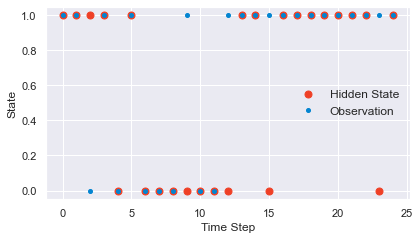

In [6]:
# We can plot the observed and hidden-state values (say the first 25)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(state_ts[:25], 'o', markersize=7, color=sns.xkcd_rgb["tomato"], label="Hidden State")
ax.plot(obs_ts[:25], 'o', markersize=4, color=sns.xkcd_rgb["cerulean"], label="Observation")

ax.set_ylabel("State")
ax.set_xlabel("Time Step")
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.show()



In [7]:
# Here, you can see the errors that emerge due to the hidden nature of the HMM
# (errors are where the blue dot (observation) does not match the red dot (true
# state) at a given point in time)

# We can calculate the error rate as well by looping over true states, and
# counting how many times the observation is different than the true state

# Specifically, we can do this with a filter
error_rate = len(list(filter(lambda x: x[0] != x[1], zip(state_ts, obs_ts)))) / len(state_ts)

# Note that this code above is essentially a more compact way of the explicit
# loop below
counter = 0
for state, obs in zip(state_ts, obs_ts):
    if state != obs:
        counter += 1

error_rate_2 = counter / len(state_ts)

In [8]:
error_rate, error_rate_2

(0.298, 0.298)

So, we can see that the 'naive' estimate of the hidden state has a ~30% error
rate (which is, expectedly, also the off diagonal entries in the B matrix.)